## Chalcogenide perovskite stability based on $\tau*$

The Figure 2, in the paper can be obtained based on the experimental data were SISSO was trained as well as the determined thresholds.

In [1]:
from tf_chpvk_pv.config import RESULTS_DIR
import pandas as pd
import pickle

df = pd.read_csv(RESULTS_DIR / "processed_chpvk_concat_dataset.csv")

df.rename(columns={"t_jess": "t*",
                   "t_sisso": "tau*",
                   "p_t_sisso": "p_tau*"}, inplace=True)

2025-12-21 17:50:19.887 | INFO     | tf_chpvk_pv.config:<module>:11 - PROJ_ROOT path is: /home/dagar/TF-ChPVK-PV


a. Modified tolerance factor distribution on the experimental perovskite data used for training

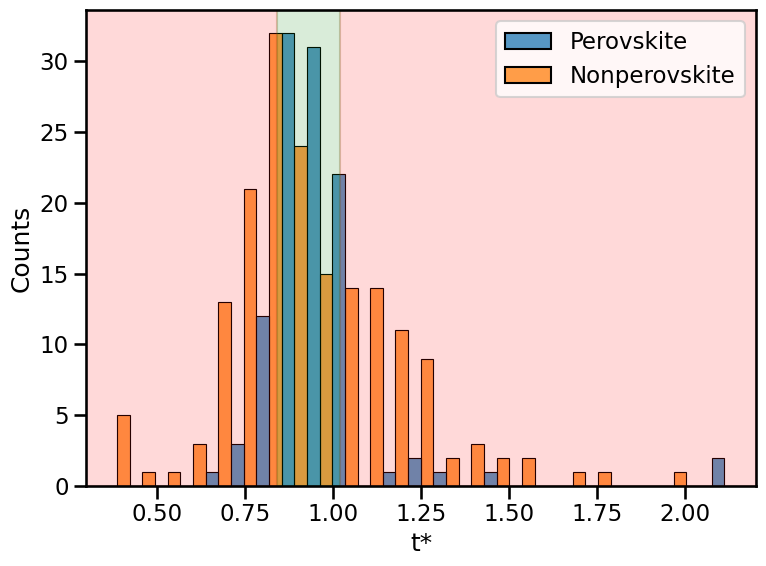

In [2]:
from tf_chpvk_pv.plots import plot_t_star_histogram

plot_t_star_histogram(thresholds=[0.84,1.02], df=df)

b. New $\tau*$ tolerance factor distribution on the experimental perovskite data

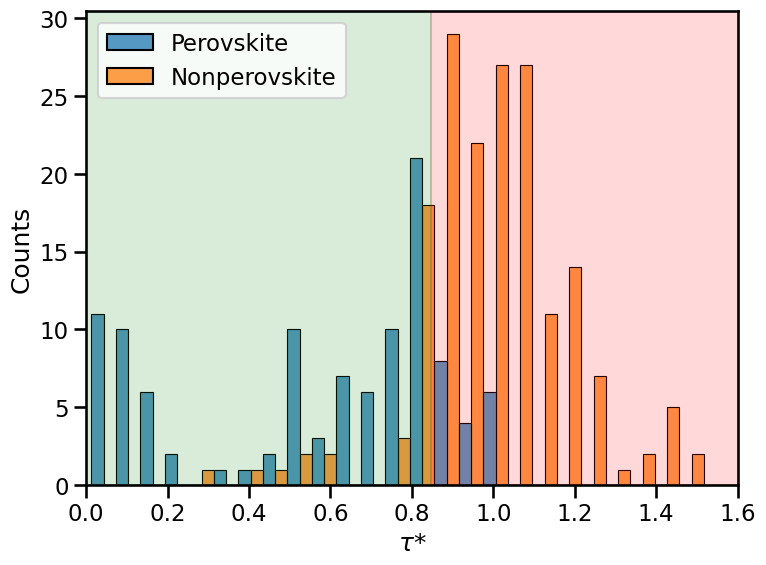

In [3]:
from tf_chpvk_pv.plots import plot_tau_star_histogram

plot_tau_star_histogram(threshold=0.846, df=df)

c. Plat scaling probability of phase stability based on the new $\tau*$ as a function of the modified tolerance factor for the experimental perovskite data

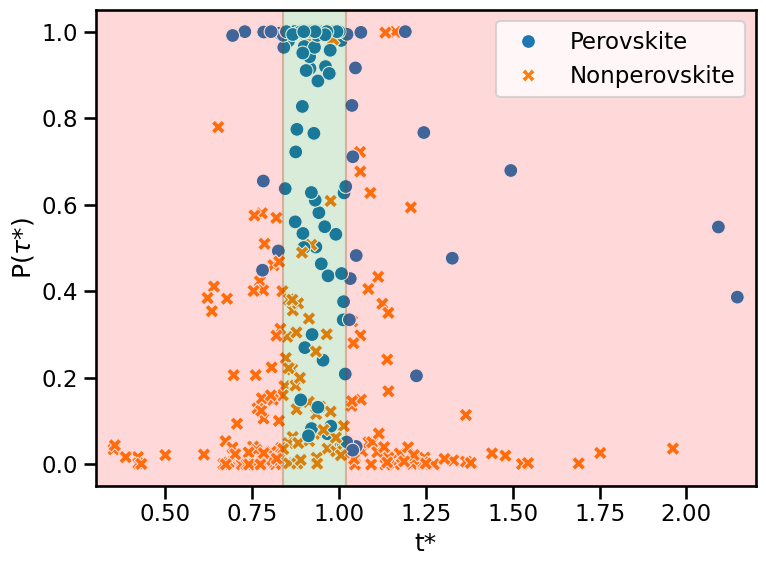

In [4]:
from tf_chpvk_pv.plots import plot_t_star_vs_p_t_sisso

plot_t_star_vs_p_t_sisso(df=df, thresholds=[0.84,1.02])

d. Elemental distribution of the predicted perovskite phases with a $\tau* < 0.496$

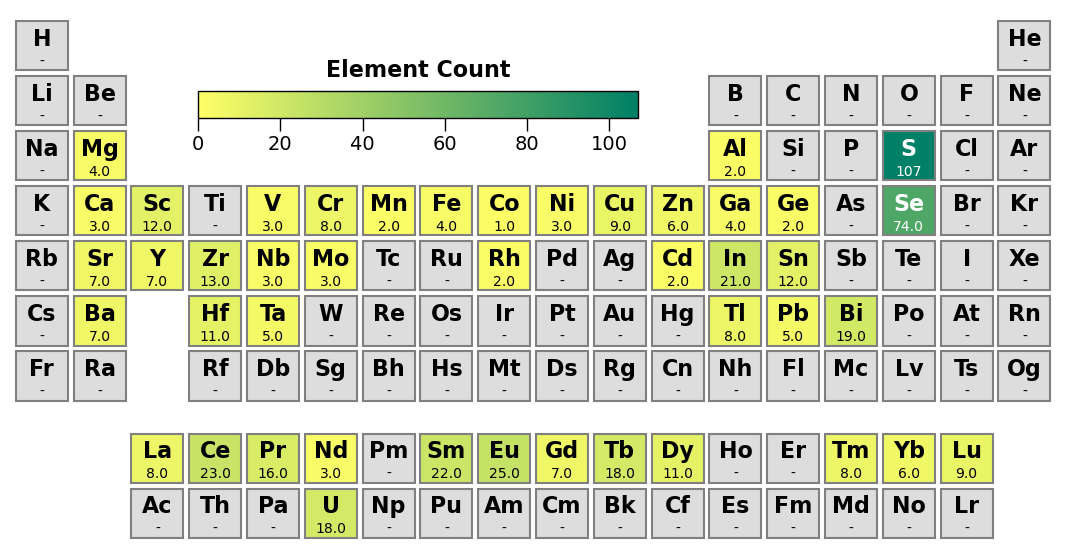

In [5]:
from tf_chpvk_pv.config import PROCESSED_DATA_DIR
from tf_chpvk_pv.plots import graph_periodic_table

df_candidates = pd.read_csv(PROCESSED_DATA_DIR / "stable_compositions.csv")

df_candidates.rename(columns={'Unnamed: 0': 'material'}, inplace=True)

graph_periodic_table(df_candidates.material.tolist())

## $\tau*$ dependence on the radii

2025-12-21 17:50:28.223 | INFO     | tf_chpvk_pv.modeling.train:train_platt_scaling:49 - Training Platt scaling model...
2025-12-21 17:50:28.262 | SUCCESS  | tf_chpvk_pv.modeling.train:train_platt_scaling:65 - Platt scaling model training complete.


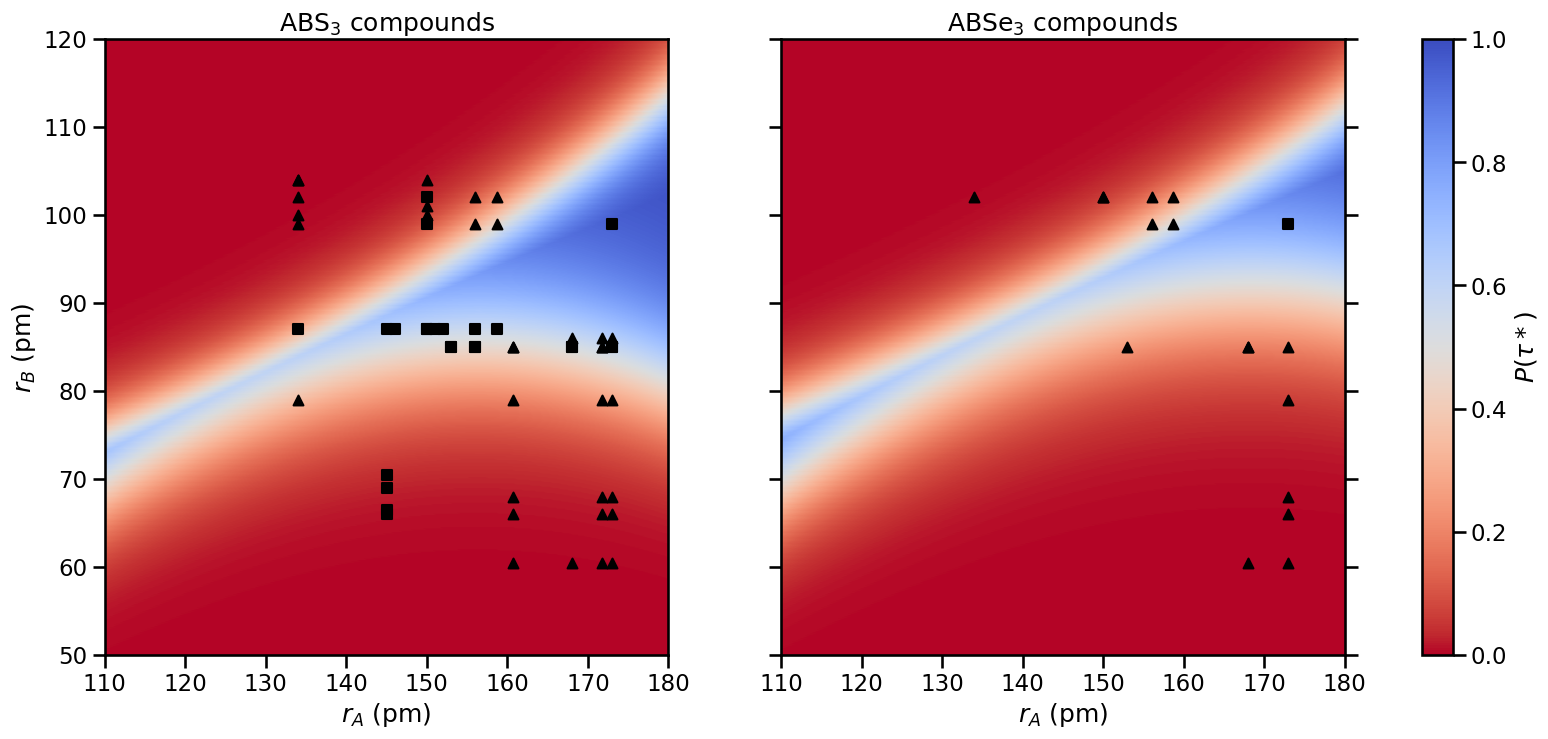

In [6]:
from tf_chpvk_pv.config import PROCESSED_DATA_DIR
from tf_chpvk_pv.plots import colormap_radii
import pandas as pd

df_exp = pd.read_csv(PROCESSED_DATA_DIR / "chpvk_dataset.csv")

df_exp.set_index('material', inplace=True)

df = pd.read_csv(PROCESSED_DATA_DIR / "valid_new_compositions.csv")

colormap_radii(df=df, exp_df=df_exp)

## Bandgap estimation

2025-12-21 18:56:03.555 | INFO     | tf_chpvk_pv.config:<module>:11 - PROJ_ROOT path is: /home/dagar/TF-ChPVK-PV


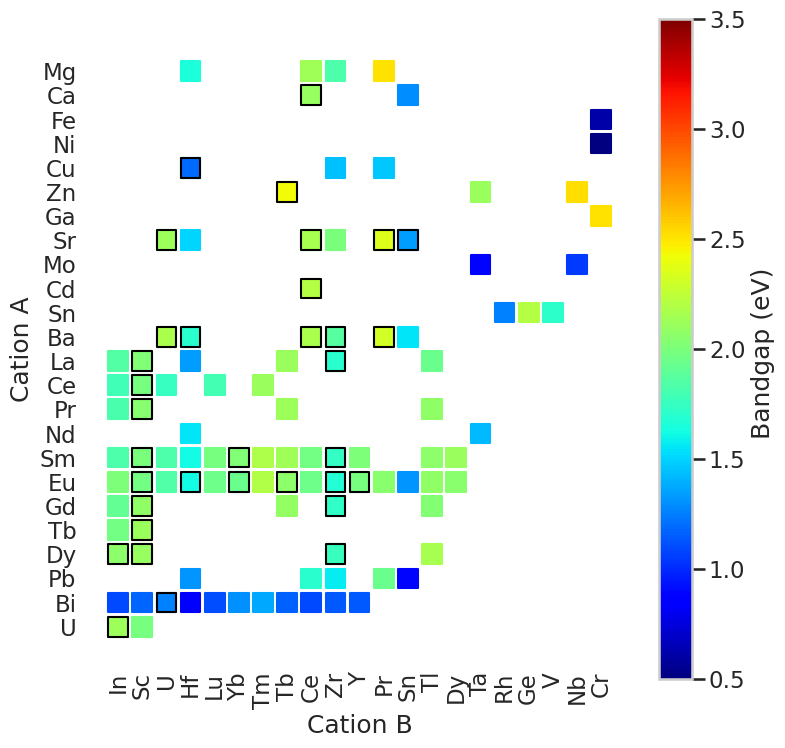

In [1]:
from tf_chpvk_pv.config import PROCESSED_DATA_DIR
from tf_chpvk_pv.plots import plot_matrix
import pandas as pd

df_crystal = pd.read_csv(PROCESSED_DATA_DIR / "results_CrystaLLM_with_bandgap.csv")

df_sisso = pd.read_csv(PROCESSED_DATA_DIR / "results_SISSO_with_bandgap.csv")

#remove from the sisso data frame the entries that are not in the crystal dataframe
#df_sisso = df_sisso[df_sisso['formula'].isin(df_crystal['formula'])]

df_sisso.rename(columns={'bandgap':'Eg'}, inplace=True)
df_crystal.rename(columns={'bandgap':'Eg'}, inplace=True)

plot_matrix(df_sisso, df_crystal, anion='S')

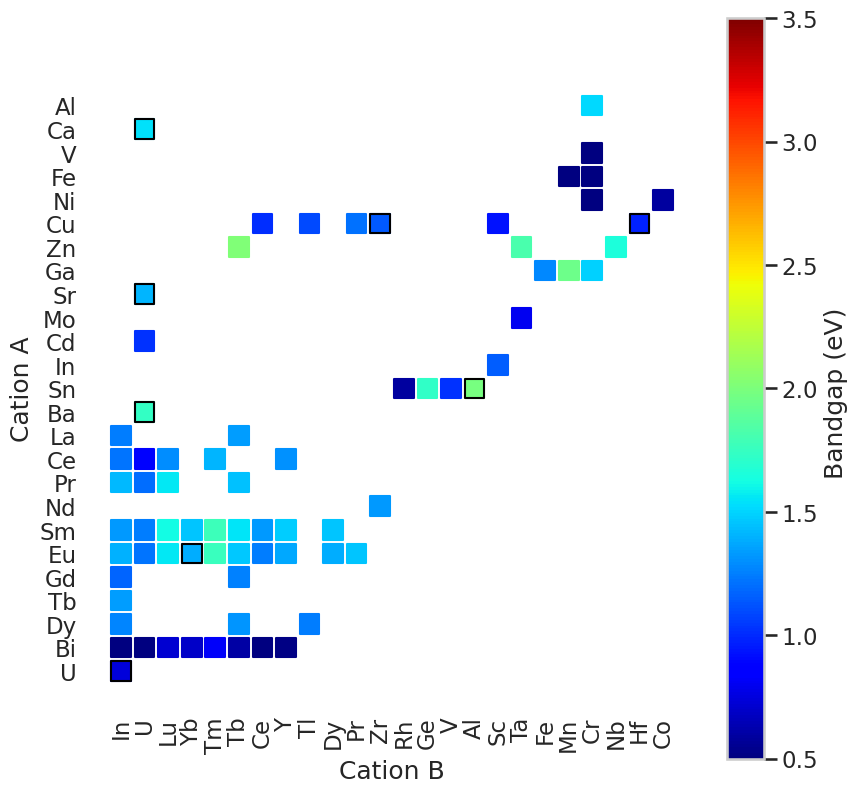

In [2]:
plot_matrix(df_sisso, df_crystal, anion='Se')